<a href="https://colab.research.google.com/github/Hyelimee/honmandeep/blob/main/%ED%98%BC%EB%A7%8C%EB%94%A5_chapter3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## DenseNet

In [ ]:
#밀집블록 만들기
import keras
from keras import layers

def dense_block(x, blocks):
    for _ in range(blocks):
        x1 = layers.BatchNormalization(epsilon=1e-5)(x)
        x1 = layers.Activation('relu')(x1)
        x1 = layers.Conv2D(128, 1, use_bias=False)(x1) #절편을 학습할 필요가 없는 경우 use_bias를 false로 설정하기도 한다
        x1 = layers.BatchNormalization(epsilon=1e-5)(x1)
        x1 = layers.Activation('relu')(x1)
        x1 = layers.Conv2D(32, 3, padding='same', use_bias=False)(x1)
        x = layers.Concatenate()([x, x1])
    return x

In [ ]:
#전환블록만들기
def transition_block(x):
    x = layers.BatchNormalization(epsilon=1e-5)(x)
    x = layers.Activation('relu')(x)
    x = layers.Conv2D(int(x.shape[-1]/2), 1, use_bias=False)(x)
    x = layers.AveragePooling2D(2)(x)
    return x

In [ ]:
inputs = layers.Input(shape=(224, 224, 3))
x = layers.ZeroPadding2D(padding=3)(inputs)   #패딩을 추가하여 가장자리에 있는 정보를 보존
x = layers.Conv2D(64, 7, strides=2, use_bias=False)(x)  #합성곱층으로 이미지의 중요 패턴을 압축하여 전달
x = layers.BatchNormalization(epsilon=1e-5)(x)
x = layers.Activation('relu')(x)
x = layers.ZeroPadding2D(padding=1)(x)
x = layers.MaxPooling2D(3, strides=2)(x)

In [ ]:
for blocks in (6, 12, 24):
    x = dense_block(x, blocks)
    x = transition_block(x)
x = dense_block(x, 16)

#밀집블록 6번-전환블록-밀집블록 12번-전환블록-밀집블록 24번-전환블록-밀집블록 16번

In [ ]:
x = layers.BatchNormalization(epsilon=1e-5)(x)
x = layers.Activation('relu')(x)
x = layers.GlobalAveragePooling2D()(x)
outputs = layers.Dense(1000, activation='softmax')(x)

In [ ]:
model = keras.Model(inputs, outputs)
model.summary()

Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_1       │ (None, 224, 224,  │          0 │ -                 │
│ (InputLayer)        │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ zero_padding2d_2    │ (None, 230, 230,  │          0 │ input_layer_1[0]… │
│ (ZeroPadding2D)     │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_120 (Conv2D) │ (None, 112, 112,  │      9,408 │ zero_padding2d_2… │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 112, 112,  │        256 │ conv2d_120[0][0]  │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation_121      │ (None, 112, 112,  │          0 │ batch_normalizat… │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ zero_padding2d_3    │ (None, 114, 114,  │          0 │ activation_121[0… │
│ (ZeroPadding2D)     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling2d_1     │ (None, 56, 56,    │          0 │ zero_padding2d_3… │
│ (MaxPooling2D)      │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 56, 56,    │        256 │ max_pooling2d_1[… │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation_122      │ (None, 56, 56,    │          0 │ batch_normalizat… │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_121 (Conv2D) │ (None, 56, 56,    │      8,192 │ activation_122[0… │
│                     │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 56, 56,    │        512 │ conv2d_121[0][0]  │
│ (BatchNormalizatio… │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation_123      │ (None, 56, 56,    │          0 │ batch_normalizat… │
│ (Activation)        │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_122 (Conv2D) │ (None, 56, 56,    │     36,864 │ activation_123[0… │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ concatenate_58      │ (None, 56, 56,    │          0 │ max_pooling2d_1[… │
│ (Concatenate)       │ 96)               │            │ conv2d_122[0][0]  │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 56, 56,    │        384 │ concatenate_58[0… │
│ (BatchNormalizatio… │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation_124      │ (None, 56, 56,    │          0 │ batch_normalizat… │
│ (Activation)        │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_123 (Conv2D) │ (None, 56, 56,    │     12,288 │ activation_124[0

 Total params: 8,062,504 (30.76 MB)

 Trainable params: 7,978,856 (30.44 MB)

 Non-trainable params: 83,648 (326.75 KB)

In [ ]:
#DenseNet 모델로 강아지 사진 분류하기

!gdown 1xGkTT3uwYt4myj6eJJeYtdEFgTi2Sj8C
!unzip cat-dog-images.zip

Downloading...
From: https://drive.google.com/uc?id=1xGkTT3uwYt4myj6eJJeYtdEFgTi2Sj8C
To: /content/cat-dog-images.zip
100% 182k/182k [00:00<00:00, 140MB/s]
Archive:  cat-dog-images.zip
   creating: images/
  inflating: images/dog.png          
  inflating: images/cat.png          


In [ ]:
#이미지 전처리
import numpy as np
from PIL import Image

dog_png = np.array(Image.open('images/dog.png'))

from keras.applications import densenet

dense_prep_dog = densenet.preprocess_input(dog_png)

In [ ]:
#모델 객체를 만든 뒤 예측 수행

densenet201 = keras.applications.DenseNet201()
predictions = densenet201.predict(dense_prep_dog[np.newaxis, :])
densenet.decode_predictions(predictions)

82524592/82524592 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 5s 5s/step
35363/35363 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


[[('n02099712', 'Labrador_retriever', np.float32(0.52812105)),
  ('n04409515', 'tennis_ball', np.float32(0.19857816)),
  ('n02104029', 'kuvasz', np.float32(0.06060524)),
  ('n02111500', 'Great_Pyrenees', np.float32(0.02718818)),
  ('n02099601', 'golden_retriever', np.float32(0.017613834))]]

## MobileNet

In [17]:
#깊이별 분리 합성곱 블록 만들기
def depthwise_separable_block(inputs, filters, strides=1):
    if strides == 1:
        x = inputs
    else:   #strides가 1이 아닌경우 입력의 크기를 조정
        x = layers.ZeroPadding2D(padding=((0, 1), (0, 1)))(inputs)
        #((0, 1), (1, 0)) 위에 0, 아래 1, 왼 0, 오 1픽셀씩 추가

    x = layers.DepthwiseConv2D(3, padding='same' if strides == 1 else 'valid',
                               strides=strides, use_bias=False)(x)
    x = layers.BatchNormalization(epsilon=1e-5)(x)
    x = layers.ReLU(max_value=6.0)(x)
    x = layers.Conv2D(filters, 1, padding='same', use_bias=False)(x)
    x = layers.BatchNormalization(epsilon=1e-5)(x)
    x = layers.ReLU(max_value=6.0)(x)
    return x

In [18]:
#MobileNet 모델 만들기
inputs = layers.Input(shape=(224, 224, 3))

x = layers.Conv2D(32, 3, padding='same', strides=2, use_bias=False)(inputs)
x = layers.BatchNormalization(epsilon=1e-5)(x)
x = layers.ReLU(max_value=6.0)(x)

In [19]:
for filters in (64, 128, 256):
    x = depthwise_separable_block(x, filters)
    x = depthwise_separable_block(x, filters*2, strides=2)

In [20]:
#512개의 필터를 사용하는 깊이별 분리 합성곱 블록을 for문으로 5회 반복

for _ in range(5):
    x = depthwise_separable_block(x, 512)
x = depthwise_separable_block(x, 1024, strides=2)
x = depthwise_separable_block(x, 1024)

In [21]:
#전역평균풀링
x = layers.GlobalAveragePooling2D(keepdims=True)(x)  #feature map 차원 유지

In [22]:
#드롭아웃 적용
x = layers.Dropout(0.001)(x)
x = layers.Conv2D(1000, 1, padding='same')(x)
x = layers.Reshape((1000, ))(x)
outputs = layers.Activation('softmax')(x)

In [23]:
model = keras.Model(inputs, outputs)
model.summary()

Model: "functional_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_3 (InputLayer)      │ (None, 224, 224, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_240 (Conv2D)             │ (None, 112, 112, 32)   │           864 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_242         │ (None, 112, 112, 32)   │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ re_lu (ReLU)                    │ (None, 112, 112, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ depthwise_conv2d                │ (None, 112, 112, 32)   │           288 │
│ (DepthwiseConv2D)               │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_243         │ (None, 112, 112, 32)   │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ re_lu_1 (ReLU)                  │ (None, 112, 112, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_241 (Conv2D)             │ (None, 112, 112, 64)   │         2,048 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_244         │ (None, 112, 112, 64)   │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ re_lu_2 (ReLU)                  │ (None, 112, 112, 64)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ zero_padding2d_6                │ (None, 113, 113, 64)   │             0 │
│ (ZeroPadding2D)                 │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ depthwise_conv2d_1              │ (None, 56, 56, 64)     │           576 │
│ (DepthwiseConv2D)               │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_245         │ (None, 56, 56, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ re_lu_3 (ReLU)                  │ (None, 56, 56, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_242 (Conv2D)             │ (None, 56, 56, 128)    │         8,192 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_246         │ (None, 56, 56, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ re_lu_4 (ReLU)                  │ (None, 56, 56, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ depthwise_conv2d_2              │ (None, 56, 56, 128)    │         1,152 │
│ (DepthwiseConv2D)               │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_247         │ (None, 56, 56, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ re_lu_5 (ReLU)                  │ (None, 56, 56, 128)    │             

 Total params: 4,253,864 (16.23 MB)

 Trainable params: 4,231,976 (16.14 MB)

 Non-trainable params: 21,888 (85.50 KB)

- densenet에 비하면 파라미터 용량을 확인했을 때 반정도 경량됨

In [24]:
#MobileNet 모델로 예측하기
from keras.applications import mobilenet

mobile_prep_dog = mobilenet.preprocess_input(dog_png)
model = keras.applications.MobileNet()
predictions = model.predict(mobile_prep_dog[np.newaxis, :])
mobilenet.decode_predictions(predictions)

17225924/17225924 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 478ms/step


[[('n02099712', 'Labrador_retriever', np.float32(0.40903974)),
  ('n02104029', 'kuvasz', np.float32(0.18954659)),
  ('n02110341', 'dalmatian', np.float32(0.14881642)),
  ('n02111500', 'Great_Pyrenees', np.float32(0.042762242)),
  ('n02099601', 'golden_retriever', np.float32(0.027608141))]]

## EfficientNet

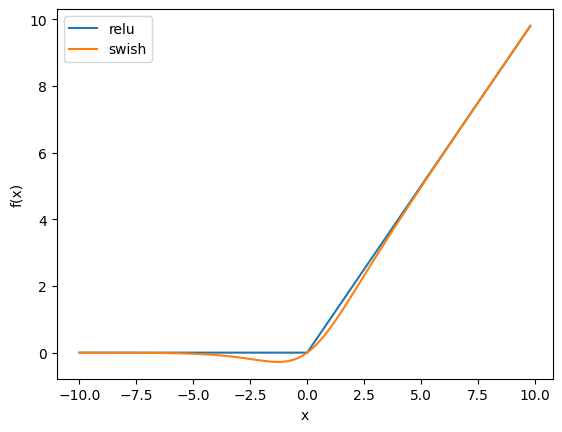

In [1]:
#swish function
import numpy as np
import matplotlib.pyplot as plt
from scipy.special import expit

x = np.arange(-10, 10, 0.2)

plt.plot(x, x.clip(0), label='relu')
plt.plot(x, x*expit(x), label='swish')
plt.xlabel('x')
plt.ylabel('f(x)')
plt.legend()
plt.show()

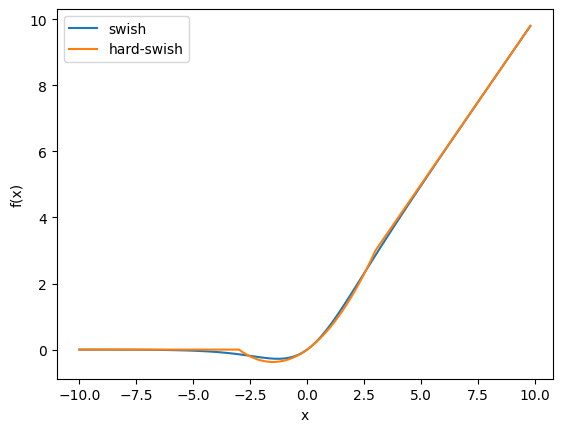

In [2]:
#hard swish function

def relu6(x):
    return np.minimum(np.maximum(x, 0), 6)

x = np.arange(-10, 10, 0.2)

plt.plot(x, x*expit(x), label='swish')
plt.plot(x, x*relu6(x+3)/6, label='hard-swish')
plt.xlabel('x')
plt.ylabel('f(x)')
plt.legend()
plt.show()

In [5]:
#역잔차블록만들기

def inv_res_block(inputs, filters_out, kernel_size, strides,
                  dropout_rate, expand_ratio):
    filters_in = inputs.shape[-1]
    filters = filters_in * expand_ratio

    #팽창구간
    if expand_ratio > 1:
        x = layers.Conv2D(filters, 1, padding='same',
                          use_bias=False)(inputs)
        x = layers.BatchNormalization()(x)
        x = layers.Activation('swish')(x)

    else:
        x = inputs

    #깊이별 분리 합성곱
    if strides == 2 :   #stride 2일때 padding
        x = layers.ZeroPadding2D(padding=padding_size(x.shape, kernel_size))(x)

    x = layers.DepthwiseConv2D(kernel_size, strides=strides,
                               use_bias=False, padding='same' if strides == 1 else 'valid')(x)
    x = layers.BatchNormalization()(x)
    x = layers.Activation('swish')(x)

    #SE블록
    se_input = x
    x = layers.GlobalAveragePooling2D(keepdims=True)(x)
    x = layers.Conv2D(int(filters_in * 0.25), 1, padding='same', activation='swish')(x)
    x = layers.Conv2D(filters, 1, padding='same', activation='sigmoid')(x)
    x = layers.Multiply()([se_input, x])
    #시그모이드 함수로 생성된 가중치를 입력 채널 개수에 곱해 중요도가 높은 채널은 강조하고 낮은 채널은 억제함

    #출력단계
    x = layers.Conv2D(filters_out, 1, use_bias=False)(x)
    x = layers.BatchNormalization()(x)
    if strides ==1 and filters_in == filters_out:
        if dropout_rate > 0:
            x = layers.Dropout(dropout_rate, noise_shape=(None, 1, 1, 1))(x)
            x = layers.Add()([x, inputs])

    return x

In [6]:
#패딩크기 계산을 위한 함수
def padding_size(input_size, kernel_size):
    #입력 크기가 짝수이면 위쪽과 왼쪽 패딩을 하나 줄인다
    padding = kernel_size // 2
    if input_size[1] % 2 == 0:
        return ((padding-1, padding), (padding-1, padding))

    else:
        return padding

In [10]:
#깊이와 너비에 값에 따라 역잔차블록 반복 횟수 및 필터개수 조정
import math

def round_repeats(repeats, depth):   #모델의 너비를 최적화하기 위해 조정
    """repeats*depth 보다 큰 정수를 반환합니다"""
    return int(math.ceil(repeats*depth))

def round_filters(filters, width):   #안정적인 필터크기 제공
    """filters*width 보다 크고 8의 배수가 되도록 만듭니다"""
    filters *= width
    new_filters = max(8, int(filters + 4) // 8 * 8)
    if new_filters < 0.9 * filters:
        new_filters += 8
    return int(new_filters)

In [11]:
#EfficientB0
import keras
from keras import layers

depth = 1.0
width = 1.0
inputs = layers.Input(shape=(224, 224, 3))

x = layers.Rescaling(1.0 / 255.0)(inputs)
x = layers.Normalization()(x)
x = layers.Rescaling(1.0 / np.sqrt([0.229, 0.224, 0.225]))(x)
x = layers.ZeroPadding2D(padding=padding_size(x.shape, 3))(x)
x = layers.Conv2D(round_filters(32, width), 3, strides=2, padding='valid', use_bias=False)(x)
x = layers.BatchNormalization()(x)
x = layers.Activation('swish')(x)

In [12]:
#역잔차블록 매개변수 준비하기

blocks_params = [
    {
        'kernel_size' : 3,
        'repeats' : 1,         #역잔차블록 몇번 반복할지
        'filters_out' : 16,
        'strides' : 1
    },
    {
        'kernel_size' : 3,
        'repeats' : 2,
        'filters_out' : 24,
        'strides' : 2
    },
    {
        'kernel_size' : 5,
        'repeats' : 2,
        'filters_out' : 40,
        'strides' : 2
    },
    {
        'kernel_size' : 3,
        'repeats' : 3,
        'filters_out' : 80,
        'strides' : 2
    },
    {
        'kernel_size' : 5,
        'repeats' : 3,
        'filters_out' : 112,
        'strides' : 1
    },
    {
        'kernel_size' : 5,
        'repeats' : 4,
        'filters_out' : 192,
        'strides' : 2
    },
    {
        'kernel_size' : 3,
        'repeats' : 1,
        'filters_out' : 320,
        'strides' : 1
    },
]

In [14]:
#역잔차블록 그룹 반복하기
filter_expand_ratio = 1
block_count = 0
total_blocks = float(sum(round_repeats(params['repeats'], depth)
                                    for params in blocks_params))
for params in blocks_params:
    #depth에 따라 블록의 입력과 출력 필터를 늘린다
    filters_out = round_filters(params['filters_out'], width)
    strides = params['strides']
    for j in range(round_repeats(params['repeats'], depth)):
        #반복의 첫번째 블록을 제외한 나머지 블록은 스트라이드 1
        if j > 0:
            strides = 1
        dropout_rate = 0.2 * block_count / total_blocks
        x = inv_res_block(x, filters_out, params['kernel_size'],
                          strides, dropout_rate, filter_expand_ratio)
        block_count += 1

    filter_expand_ratio = 6

In [15]:
#모델을 만들어 구조 확인하기
x = layers.Conv2D(round_filters(1280, width), 1, padding='same', use_bias=False)(x)
x = layers.BatchNormalization()(x)
x = layers.Activation('swish')(x)

x = layers.GlobalAveragePooling2D()(x)
x = layers.Dropout(0.2)(x)
outputs = layers.Dense(1000, activation='softmax')(x)

model = keras.Model(inputs, outputs)
model.summary()

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer         │ (None, 224, 224,  │          0 │ -                 │
│ (InputLayer)        │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ rescaling           │ (None, 224, 224,  │          0 │ input_layer[0][0] │
│ (Rescaling)         │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ normalization       │ (None, 224, 224,  │          7 │ rescaling[0][0]   │
│ (Normalization)     │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ rescaling_1         │ (None, 224, 224,  │          0 │ normalization[0]… │
│ (Rescaling)         │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ zero_padding2d      │ (None, 225, 225,  │          0 │ rescaling_1[0][0] │
│ (ZeroPadding2D)     │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d (Conv2D)     │ (None, 112, 112,  │        864 │ zero_padding2d[0… │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalization │ (None, 112, 112,  │        128 │ conv2d[0][0]      │
│ (BatchNormalizatio… │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation          │ (None, 112, 112,  │          0 │ batch_normalizat… │
│ (Activation)        │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ depthwise_conv2d    │ (None, 112, 112,  │        288 │ activation[0][0]  │
│ (DepthwiseConv2D)   │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 112, 112,  │        128 │ depthwise_conv2d… │
│ (BatchNormalizatio… │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation_1        │ (None, 112, 112,  │          0 │ batch_normalizat… │
│ (Activation)        │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ global_average_poo… │ (None, 1, 1, 32)  │          0 │ activation_1[0][… │
│ (GlobalAveragePool… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_1 (Conv2D)   │ (None, 1, 1, 8)   │        264 │ global_average_p… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_2 (Conv2D)   │ (None, 1, 1, 32)  │        288 │ conv2d_1[0][0]    │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ multiply (Multiply) │ (None, 112, 112,  │          0 │ activation_1[0][… │
│                     │ 32)               │            │ conv2d_2[0][0]    │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_3 (Conv2D)   │ (None, 112, 112,  │        512 │ multiply[0][0]    │
│                     │ 16)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 112, 112,  │         64 │ conv2d_3[0][0]    │
│ (BatchNormalizatio… │ 16)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼─────────────────

 Total params: 5,330,571 (20.33 MB)

 Trainable params: 5,288,548 (20.17 MB)

 Non-trainable params: 42,023 (164.16 KB)

In [16]:
#EfficientNet으로 강아지 사진 분류하기

!gdown 1xGkTT3uwYt4myj6eJJeYtdEFgTi2Sj8C
!unzip cat-dog-images.zip

Downloading...
From: https://drive.google.com/uc?id=1xGkTT3uwYt4myj6eJJeYtdEFgTi2Sj8C
To: /content/cat-dog-images.zip
100% 182k/182k [00:00<00:00, 9.99MB/s]
Archive:  cat-dog-images.zip
   creating: images/
  inflating: images/dog.png          
  inflating: images/cat.png          


In [17]:
import numpy as np
from PIL import Image

dog_png = np.array(Image.open('images/dog.png'))

from keras.applications import efficientnet

efficientb0 = keras.applications.EfficientNetB0()
predictions = efficientb0.predict(dog_png[np.newaxis, :])
efficientnet.decode_predictions(predictions)

21834768/21834768 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
35363/35363 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


[[('n02099712', 'Labrador_retriever', np.float32(0.36829436)),
  ('n02104029', 'kuvasz', np.float32(0.19339848)),
  ('n02099601', 'golden_retriever', np.float32(0.06145822)),
  ('n02111500', 'Great_Pyrenees', np.float32(0.05779685)),
  ('n02095889', 'Sealyham_terrier', np.float32(0.017902818))]]

In [22]:
#B1 model
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from tensorflow.keras.applications.efficientnet import preprocess_input
import numpy as np
import tensorflow.keras.applications.efficientnet as efficientnet
from tensorflow import keras

# dog_png만 미리 모델 입력 형식에 맞게 준비
img = load_img('images/dog.png', target_size=(240, 240))  # PIL 이미지
dog_png = img_to_array(img)                              # numpy 배열로 변환
dog_png = preprocess_input(dog_png)                      # EfficientNetB1 전처리


efficientb1 = keras.applications.EfficientNetB1()
predictions = efficientb1.predict(dog_png[np.newaxis, :])
efficientnet.decode_predictions(predictions)

1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step


[[('n02104029', 'kuvasz', np.float32(0.5198164)),
  ('n02099601', 'golden_retriever', np.float32(0.0938532)),
  ('n02099712', 'Labrador_retriever', np.float32(0.088031314)),
  ('n02111500', 'Great_Pyrenees', np.float32(0.059566814)),
  ('n04409515', 'tennis_ball', np.float32(0.029226625))]]

In [24]:
#B2 model
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from tensorflow.keras.applications.efficientnet import preprocess_input
import numpy as np
import tensorflow.keras.applications.efficientnet as efficientnet
from tensorflow import keras

# dog_png만 미리 모델 입력 형식에 맞게 준비
img = load_img('images/dog.png', target_size=(260, 260))  # PIL 이미지
dog_png = img_to_array(img)                              # numpy 배열로 변환
dog_png = preprocess_input(dog_png)                      # EfficientNet 전처리


efficientb2 = keras.applications.EfficientNetB2()
predictions = efficientb2.predict(dog_png[np.newaxis, :])
efficientnet.decode_predictions(predictions)

1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step


[[('n02104029', 'kuvasz', np.float32(0.38315034)),
  ('n02099712', 'Labrador_retriever', np.float32(0.03984477)),
  ('n02099601', 'golden_retriever', np.float32(0.039339762)),
  ('n02095889', 'Sealyham_terrier', np.float32(0.022062182)),
  ('n02111500', 'Great_Pyrenees', np.float32(0.013701007))]]

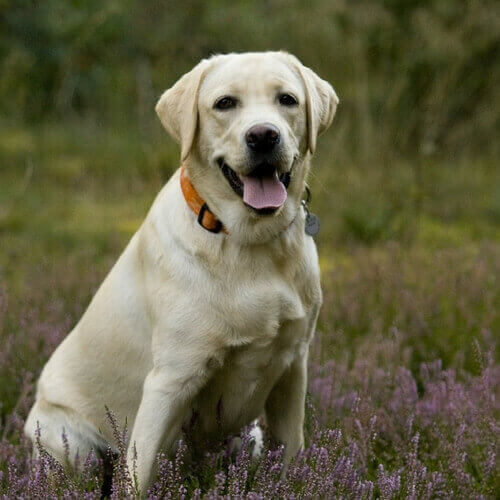

In [27]:
#어게인 어른강쥐
import cv2
import numpy as np
from google.colab.patches import cv2_imshow
import requests

url = 'https://www.vidavetcare.com/wp-content/uploads/sites/234/2022/04/labrador-retriever-dog-breed-info.jpeg'
resp = requests.get(url, stream=True).raw
img = np.asarray(bytearray(resp.read()), dtype="uint8")
img = cv2.imdecode(img, cv2.IMREAD_COLOR)

cv2_imshow(img)

In [29]:
dog_array = np.array(img)
dog_array.shape

(500, 500, 3)

In [31]:
resized_dog = cv2.resize(dog_array, (224, 224))  # (width, height)
print(resized_dog.shape)

(224, 224, 3)


In [32]:
#DenseNet
import numpy as np
from PIL import Image
from keras.applications import densenet

dense_prep_dog = densenet.preprocess_input(resized_dog)
densenet201 = keras.applications.DenseNet201()
predictions = densenet201.predict(dense_prep_dog[np.newaxis, :])
densenet.decode_predictions(predictions)

82524592/82524592 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 7s 7s/step


[[('n02099712', 'Labrador_retriever', np.float32(0.92752004)),
  ('n02099849', 'Chesapeake_Bay_retriever', np.float32(0.015377084)),
  ('n02099601', 'golden_retriever', np.float32(0.010300909)),
  ('n02092339', 'Weimaraner', np.float32(0.006966066)),
  ('n02108422', 'bull_mastiff', np.float32(0.006807339))]]

In [33]:
#MobileNet
from keras.applications import mobilenet

mobile_prep_dog = mobilenet.preprocess_input(resized_dog)
model = keras.applications.MobileNet()
predictions = model.predict(mobile_prep_dog[np.newaxis, :])
mobilenet.decode_predictions(predictions)

17225924/17225924 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 677ms/step


[[('n02099712', 'Labrador_retriever', np.float32(0.9656703)),
  ('n02092339', 'Weimaraner', np.float32(0.011608871)),
  ('n02099601', 'golden_retriever', np.float32(0.003436203)),
  ('n02087394', 'Rhodesian_ridgeback', np.float32(0.002824536)),
  ('n02108422', 'bull_mastiff', np.float32(0.0021568397))]]

In [34]:
#EfficientNetB0
from keras.applications import efficientnet

efficientb0 = keras.applications.EfficientNetB0()
predictions = efficientb0.predict(resized_dog[np.newaxis, :])
efficientnet.decode_predictions(predictions)

1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step


[[('n02099712', 'Labrador_retriever', np.float32(0.55122787)),
  ('n02092339', 'Weimaraner', np.float32(0.04437741)),
  ('n02108422', 'bull_mastiff', np.float32(0.030285224)),
  ('n02099849', 'Chesapeake_Bay_retriever', np.float32(0.01881953)),
  ('n02099601', 'golden_retriever', np.float32(0.01391373))]]

In [38]:
#B1 model
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from tensorflow.keras.applications.efficientnet import preprocess_input
import numpy as np
import tensorflow.keras.applications.efficientnet as efficientnet
from tensorflow import keras

img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)    # EfficientNet은 RGB 기준
resized_dog = cv2.resize(img, (240, 240))     # (width, height) 순서 주의!
resized_dog = resized_dog.astype(np.float32)  # float형으로 바꿔줘야 함


efficientb1 = keras.applications.EfficientNetB1()
predictions = efficientb1.predict(resized_dog[np.newaxis, :])
efficientnet.decode_predictions(predictions)

1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step


[[('n02099712', 'Labrador_retriever', np.float32(0.82954293)),
  ('n02099601', 'golden_retriever', np.float32(0.07188262)),
  ('n02104029', 'kuvasz', np.float32(0.0032557119)),
  ('n02101556', 'clumber', np.float32(0.0018770648)),
  ('n04409515', 'tennis_ball', np.float32(0.0015043904))]]

In [40]:
#B2 model
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from tensorflow.keras.applications.efficientnet import preprocess_input
import numpy as np
import tensorflow.keras.applications.efficientnet as efficientnet
from tensorflow import keras

img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)    # EfficientNet은 RGB 기준
resized_dog = cv2.resize(img, (260, 260))     # (width, height) 순서 주의!
resized_dog = resized_dog.astype(np.float32)  # float형으로 바꿔줘야 함


efficientb2 = keras.applications.EfficientNetB2()
predictions = efficientb2.predict(resized_dog[np.newaxis, :])
efficientnet.decode_predictions(predictions)

1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step


[[('n02099712', 'Labrador_retriever', np.float32(0.84742814)),
  ('n02099601', 'golden_retriever', np.float32(0.037837017)),
  ('n02108422', 'bull_mastiff', np.float32(0.0034273886)),
  ('n02099849', 'Chesapeake_Bay_retriever', np.float32(0.0022261473)),
  ('n04409515', 'tennis_ball', np.float32(0.0022039488))]]